<a href="https://colab.research.google.com/github/YelisettyRahul/neural_network-on-machine-learning/blob/main/01_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#introduction to regression with neural netweork

In [ ]:
#import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


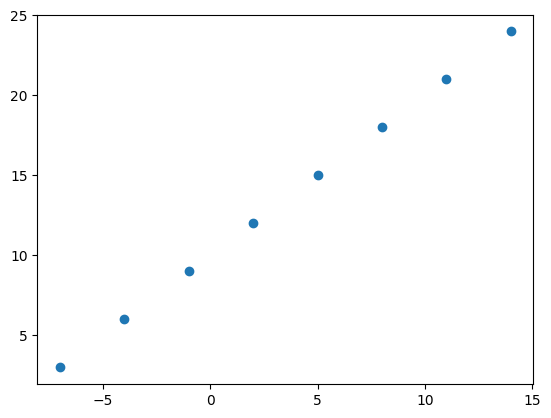

In [ ]:
##create data to view and fit

import numpy as np
import matplotlib.pyplot as plt


#create features

x=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create labels
y= np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


#viualize it

plt.scatter(x,y)


In [ ]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

* Input shapes and output shapes


In [ ]:

# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape=x.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#turn our numpy aarrays as tensors
x=tf.constant(x)
y=tf.constant(y)

x,y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## steps in modeling with Tensorflow

Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).

* Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).
Let's see these in action using the Keras Sequential API to build a model for our regression data. And then we'll step through each.

Note: If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

In [ ]:
#set random seed
tf.random.set_seed(42)


#create model using sequential
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#compiler the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae','accuracy'])

#Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=20)




Epoch 1/20
1/1 [==============================] - 1s 802ms/step - loss: 19.4528 - mae: 19.4528 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 18ms/step - loss: 19.1716 - mae: 19.1716 - accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 13ms/step - loss: 18.8903 - mae: 18.8903 - accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 14ms/step - loss: 18.6091 - mae: 18.6091 - accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 16ms/step - loss: 18.3278 - mae: 18.3278 - accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 18.0466 - mae: 18.0466 - accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 14ms/step - loss: 17.7653 - mae: 17.7653 - accuracy: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 0s 13ms/step - loss: 17.4841 - mae: 17.4841 - accuracy: 0.0000e+00
Epoch 9/20
1/1 [==============================] - 0s 19ms/step 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 178ms/step


array([[-4.5893784]], dtype=float32)

In [ ]:
#improving our model

#let rebuild our model

#1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])


#3.fit the model(this time we train for longer)
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 535ms/step - loss: 12.7719 - mae: 12.7719
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.6394 - mae: 12.6394
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 12.5069 - mae: 12.5069
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3744 - mae: 12.3744
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2419 - mae: 12.2419
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.1094 - mae: 12.1094
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9769 - mae: 11.9769
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8444 - mae: 11.8444
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 11.7119 - mae: 11.7119
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5794 - mae: 11.5794
Epoch 11/100
1/1 [==============================] 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 109ms/step


array([[29.978794]], dtype=float32)

In [ ]:
#improving our model

#let rebuild our model

#1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])


#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])


#3.fit the model(this time we train for longer)
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 965ms/step - loss: 14.1909 - mae: 14.1909
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.6207 - mae: 13.6207
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 13.0574 - mae: 13.0574
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4959 - mae: 12.4959
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9313 - mae: 11.9313
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3682 - mae: 11.3682
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7902 - mae: 10.7902
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 10.2051 - mae: 10.2051
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 9.6356 - mae: 9.6356
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0524 - mae: 9.0524
Epoch 11/100
1/1 [==============================] - 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 173ms/step


array([[31.729]], dtype=float32)

In [ ]:
#improving our model

#let rebuild our model

#1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])


#2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics=['mae'])


#3.fit the model(this time we train for longer)
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.4630 - mae: 14.4630
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 14.3958 - mae: 14.3958
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.3286 - mae: 14.3286
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 14.2615 - mae: 14.2615
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 14.1945 - mae: 14.1945
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 14.1276 - mae: 14.1276
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 14.0607 - mae: 14.0607
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 13.9939 - mae: 13.9939
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 13.9271 - mae: 13.9271
Epoch 10/100
1/1 [==============================] - 0s 30ms/step - loss: 13.8604 - mae: 13.8604
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([19.0])

1/1 [==============================] - 0s 425ms/step


array([[29.88724]], dtype=float32)

In [ ]:
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)


## evaluating a model


#'VISUALIZE'

# the data -what data are we working with
#the model itself

In [ ]:
#make a bigger data set

x=tf.range(-100,100,4)
x


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

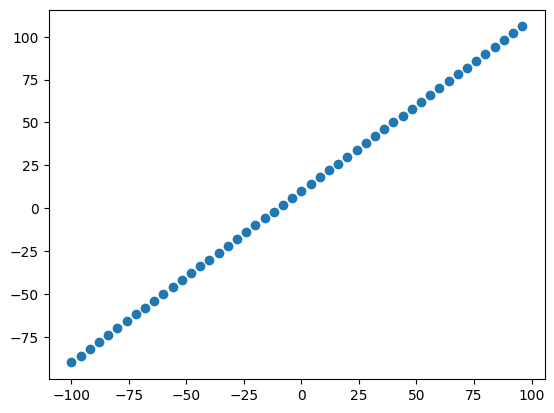

In [ ]:
#visualize the data

import matplotlib.pyplot as plt

plt.scatter(x,y)

In [ ]:
 #the 3 set
 #the training set
 #the validation set
 #the test set
len(x)


50

In [ ]:
#train data
x_train=x[:40]
y_train=y[:40]

#test data

x_test=x[40:]
y_test=y[40:]



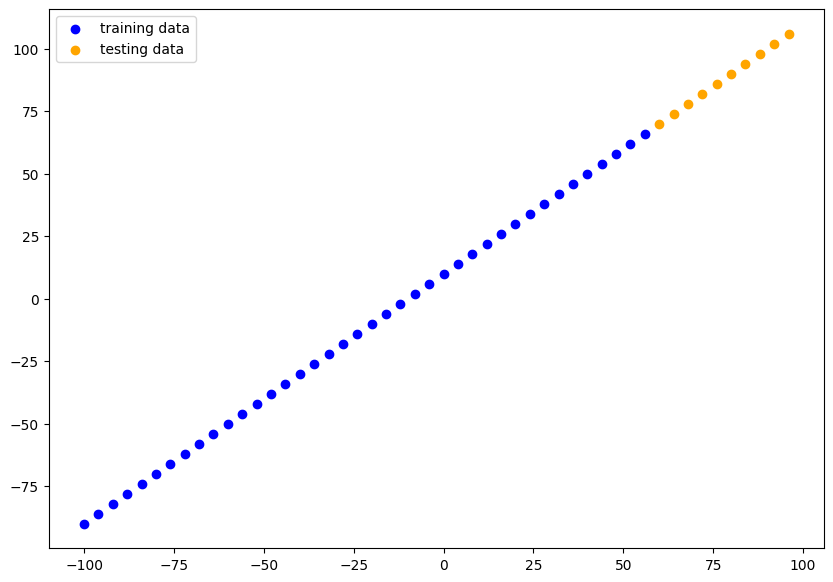

In [ ]:
### visualize the dta
plt.figure(figsize=(10,7))

plt.scatter(x_train,y_train,c='b',label='training data')

#plot test data
plt.scatter(x_test,y_test,c='orange',label="testing data")

plt.legend();

In [ ]:
x,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
 #create a neural netwrok
model=tf.keras.Sequential([
tf.keras.layers.Dense(1)
 ])

 # compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.0001),
               metrics=['mae'])


 #3. Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 135.9469 - mae: 135.9469
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 135.8415 - mae: 135.8415
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 135.7485 - mae: 135.7485
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 135.6477 - mae: 135.6477
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 135.5476 - mae: 135.5476
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 135.4499 - mae: 135.4499
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 135.3470 - mae: 135.3470
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 135.2482 - mae: 135.2482
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 135.1551 - mae: 135.1551
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 135.0524 - mae: 135.0524
Epoch 11/100
2/2 [==============

In [ ]:
#lets create a model  which builds automatically by defining the input shape argument int the first layer

In [ ]:
model.predict([110.0])

1/1 [==============================] - 0s 118ms/step


array([[-167.20903]], dtype=float32)

In [ ]:
tf.random.set_seed(42)

 #create a neural netwrok
model=tf.keras.Sequential([
tf.keras.layers.Dense(10,input_shape=[1])
 ])

 # compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])





In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


* total params of paramaetrs in the model
* trainable paramaeters  - these are the  parameters the model can update as it trains
* no_trainable these parameters cannot update during training

In [ ]:
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 44.9943 - mae: 44.9943
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 40.4870 - mae: 40.4870
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 36.3056 - mae: 36.3056
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 32.7245 - mae: 32.7245
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 29.3819 - mae: 29.3819
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 26.0398 - mae: 26.0398
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 22.8159 - mae: 22.8159
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 19.6995 - mae: 19.6995
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 17.0726 - mae: 17.0726
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 15.0328 - mae: 15.0328
Epoch 11/100
2/2 [==============================] 

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


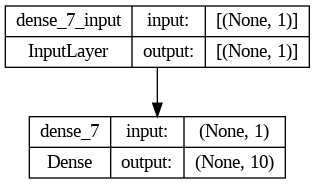

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

In [ ]:
tf.random.set_seed(42)

 #create a neural netwrok
model=tf.keras.Sequential([
tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
tf.keras.layers.Dense(1,name="output_layer")
 ],name='model_1')

 # compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(x,axis=-1),y,epochs=25,verbose=1)

Epoch 1/25
2/2 [==============================] - 2s 20ms/step - loss: 69.7000 - mae: 69.7000
Epoch 2/25
2/2 [==============================] - 0s 16ms/step - loss: 32.2366 - mae: 32.2366
Epoch 3/25
2/2 [==============================] - 0s 8ms/step - loss: 34.3746 - mae: 34.3746
Epoch 4/25
2/2 [==============================] - 0s 9ms/step - loss: 23.4456 - mae: 23.4456
Epoch 5/25
2/2 [==============================] - 0s 8ms/step - loss: 23.0378 - mae: 23.0378
Epoch 6/25
2/2 [==============================] - 0s 11ms/step - loss: 19.8271 - mae: 19.8271
Epoch 7/25
2/2 [==============================] - 0s 8ms/step - loss: 20.6410 - mae: 20.6410
Epoch 8/25
2/2 [==============================] - 0s 8ms/step - loss: 17.2081 - mae: 17.2081
Epoch 9/25
2/2 [==============================] - 0s 8ms/step - loss: 25.9681 - mae: 25.9681
Epoch 10/25
2/2 [==============================] - 0s 14ms/step - loss: 20.2509 - mae: 20.2509
Epoch 11/25
2/2 [==============================] - 0s 13ms/step -

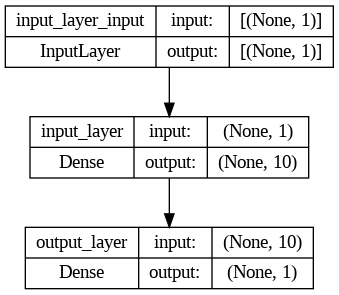

In [ ]:
plot_model(model=model,show_shapes=True)

In [ ]:
###Visualizing our model predictions

###Visualizing our model predictions

to visualized prediction its a good idea to plot them aganist the ground truth labels

In [ ]:
#To Visualized our model predictions
y_preds=model.predict(x_test)


1/1 [==============================] - 0s 166ms/step


In [ ]:
y_preds

array([[49.550095],
       [52.83233 ],
       [56.11455 ],
       [59.396786],
       [62.67902 ],
       [65.96126 ],
       [69.24348 ],
       [72.52572 ],
       [75.80794 ],
       [79.09018 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#lets  create a ploting function


def plot_prediction(train_data=x_train,train_labels=y_train,test_data=x_test,test_labels=y_test,
                    predictions=y_preds):
  #plot training data

  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c='b',label='training data')

#plot test data
  plt.scatter(test_data,test_labels,c='orange',label="testing data")
#plot models prediction in red
  plt.scatter(test_data,predictions,c='r',label='Prediction')

  #show the legend
  plt.legend();

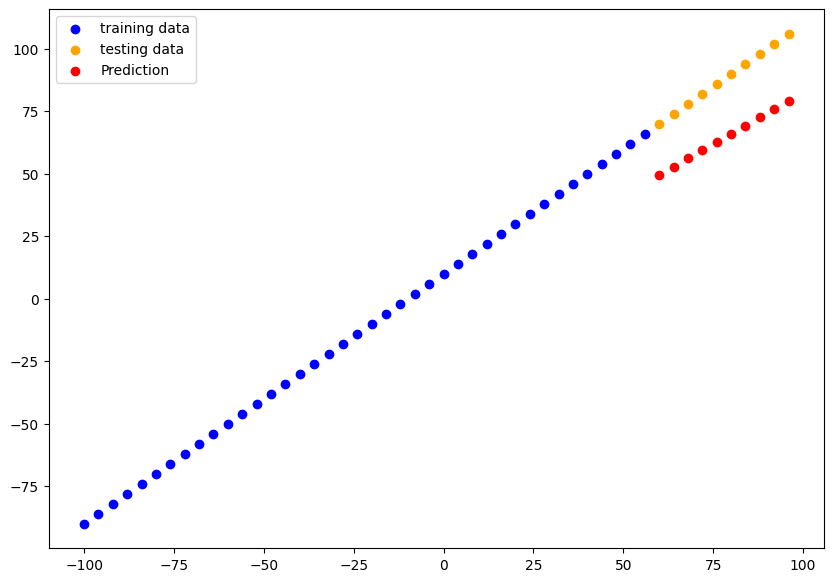

In [ ]:
plot_prediction()

In [ ]:
y_preds

array([[49.550095],
       [52.83233 ],
       [56.11455 ],
       [59.396786],
       [62.67902 ],
       [65.96126 ],
       [69.24348 ],
       [72.52572 ],
       [75.80794 ],
       [79.09018 ]], dtype=float32)

### evaluating our models prediction with regression evaluation metrics

MAE,MSE   

In [ ]:
#evaluating the  model on the test
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 265ms/step - loss: 23.6799 - mae: 23.6799


[23.679866790771484, 23.679866790771484]

In [ ]:
#caluclate the mean absolute error

mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_preds))

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([38.449905, 35.16767 , 31.885448, 28.603214, 25.32098 , 22.038742,
       18.756523, 15.979425, 13.715238, 11.963928], dtype=float32)>

In [ ]:
mae=tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(y_preds))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=23.679865>

In [ ]:
#caluclate mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_preds))

mse

<tf.Tensor: shape=(), dtype=float32, numpy=564.9864>

In [ ]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

#running experiments to run our model


1.  get more data
2.  make your model larger
3.  train for longer

# lets so 3 model experiment

1. model_1 trained as 1 layer for 100 epochs

2. model 2 trained 2layers trained for 100 epochs

3.'model 3 trained 2 layers tarined for 500






In [ ]:
#build model 1

tf.random.set_seed(42)

#1.Create the model
model_1=tf.keras.Sequential([tf.keras.layers.Dense(1)
])

#2. comppiler the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),metrics=['mae']
              )

#3.Fit the model

model_1.fit(tf.expand_dims(x,axis=-1),y,epochs=100,verbose=1)


Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 55.8027 - mae: 55.8027
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 15.8788 - mae: 15.8788
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 12.7011 - mae: 12.7011
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0989 - mae: 10.0989
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 15.5913 - mae: 15.5913
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 12.2610 - mae: 12.2610
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 9.2591 - mae: 9.2591
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 11.4267 - mae: 11.4267
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 9.8649 - mae: 9.8649
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 9.9213 - mae: 9.9213
Epoch 11/100
2/2 [==============================] - 0s 9m

1/1 [==============================] - 0s 84ms/step


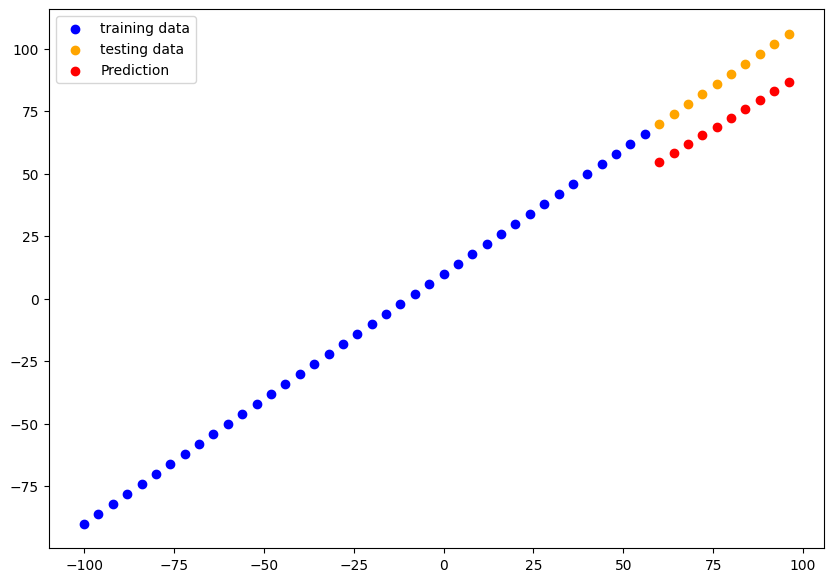

In [ ]:
#make and plot prediction for model 1

y_preds_1=model_1.predict(x_test)

plot_prediction(predictions=y_preds_1)

In [ ]:
#Caluclate model_1 evaluation

mae1=mae(y_test,tf.squeeze(y_preds_1))
mse1=mse(y_test,tf.squeeze(y_preds_1))
mae1,mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.358173>,
 <tf.Tensor: shape=(), dtype=float32, numpy=303.03485>)

Build model2
* 2 dense layer,trained for 100 epochs


In [ ]:
#set the random seed
tf.random.set_seed(42)

# 1.Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#2.compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

#3. fit the model

model_2.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=1)


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 42.1514 - mae: 42.1514
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 25.0530 - mae: 25.0530
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.9950 - mae: 29.9950
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 28.7643 - mae: 28.7643
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 13.9728 - mae: 13.9728
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2051 - mae: 11.2051
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2213 - mae: 12.2213
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 10.9076 - mae: 10.9076
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 38.2122 - mae: 38.2122
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.7677 - mae: 25.7677
Epoch 11/100
2/2 [==============================] - 0s 9ms

1/1 [==============================] - 0s 88ms/step


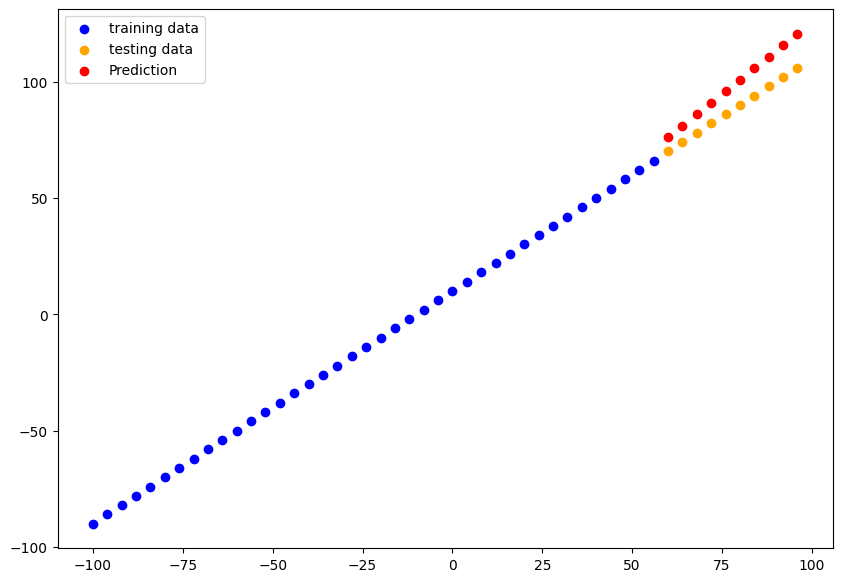

In [ ]:
# make and plot predictions
y_preds_2=model_2.predict(x_test)

plot_prediction(predictions=y_preds_2)

In [ ]:
#metrics

mae2=mae(y_test,y_preds_2)
mse2=mse(y_test,y_preds_2)
mae2,mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.268595>,
 <tf.Tensor: shape=(), dtype=float32, numpy=112.84975>)

In [ ]:
#build model 3

tf.random.set_seed(42)

#1.Create the model
model_3=tf.keras.Sequential([tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)

])

#2. comppiler the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),metrics=['mae']
              )

#3.Fit the model

model_3.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=500,verbose=1)




Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 8.4216 - mae: 8.4216
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 38.6603 - mae: 38.6603
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 26.5731 - mae: 26.5731
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 13.5785 - mae: 13.5785
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 18.3539 - mae: 18.3539
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 9.2780 - mae: 9.2780
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 10.2680 - mae: 10.2680
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 11.2270 - mae: 11.2270
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 41.9460 - mae: 41.9460
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 29.1494 - mae: 29.1494
Epoch 11/500
2/2 [==============================] - 0s 9ms/st

1/1 [==============================] - 0s 86ms/step


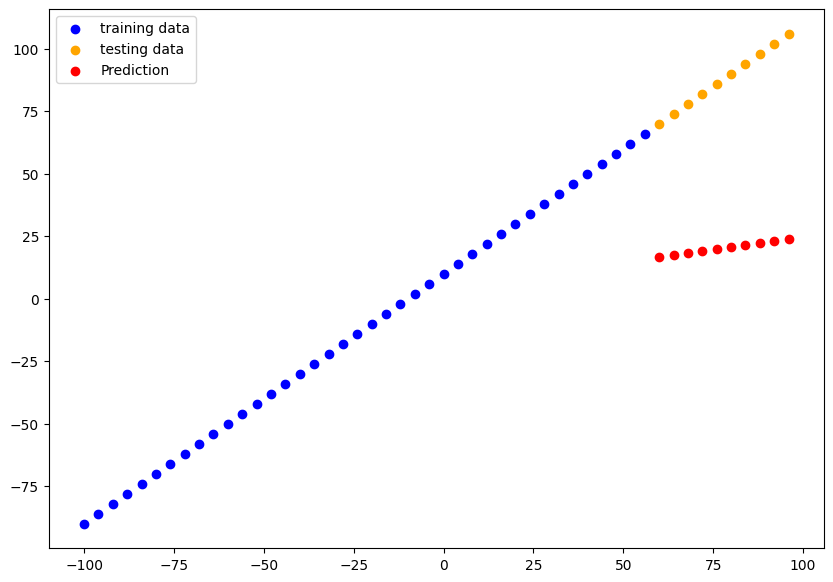

In [ ]:
#make and plot prediction

# make and plot predictions
y_preds_3=model_3.predict(x_test)

plot_prediction(predictions=y_preds_3)

training for too long can cause damage

In [ ]:
#metrics

mae3=mae(y_test,y_preds_3)
mse3=mse(y_test,y_preds_3)
mae3,mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.62189>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4656.721>)

COMPARE THE RESULTS OF OUR EXPERIMENTS

In [ ]:
#lets compare our models results

import pandas as pd

model_results=[["model_1",mae1.numpy(),mse1.numpy()],
               ["model_2",mae2.numpy(),mse2.numpy()],
               ['model_3',mae3.numpy(),mse3.numpy()]]

all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results



,model,mae,mse
0,model_1,17.358173,303.034851
1,model_2,10.268595,112.849747
2,model_3,67.621887,4656.721191


save  the model
there are two main frmats we can save our model

1  the save model format

2  the hdf5 form

In [ ]:
  #save model using the savedmodel format
  model_2.save("best_model_savemodel")

In [ ]:
#save the hdf5  format
model_2.save("best_model_Saved_format.h5")


In [ ]:
#load the model
saved_model=tf.keras.models.load_model("/content/best_model_savemodel")

In [ ]:
saved_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
saved_model2=tf.keras.models.load_model("/content/best_model_Saved_format.h5")

In [ ]:
saved_model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


a larger dataset

In [ ]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
#read the insurance dataset

insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
#lets try one hot encoding

insurance_up=pd.get_dummies(insurance)

In [ ]:
insurance_up.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#create x and y (features and labels)
#create training and test sets
#Build a neural network

In [ ]:
#create x and y
x= insurance_up.drop("charges",axis=1)
y=insurance_up['charges']

In [ ]:
x,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
#create training and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
len(x_train),len(x_test)

(1070, 268)

In [ ]:
#build a neural network(SORT OF LIKE MODEL_2)

tf.random.set_seed(42)

#create a model

modelq=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)

])

#2. compile the model

modelq.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

#3 Fit the model

modelq.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=1)




Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13177.7061 - mae: 13177.7061
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12260.3115 - mae: 12260.3115
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12167.6748 - mae: 12167.6748
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12090.6455 - mae: 12090.6455
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11971.4688 - mae: 11971.4688
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11776.5742 - mae: 11776.5742
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11437.0059 - mae: 11437.0059
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10912.5605 - mae: 10912.5605
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10294.1953 - mae: 10294.1953
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9654.115

In [ ]:
#check the results of the insurance  model on the test data
modelq.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8914.7656 - mae: 8914.7656


[8914.765625, 8914.765625]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
#improve our model
# add an extra layer
#train for longer
#(insert yourn own experiment here)

In [ ]:

tf.random.set_seed(42)

#create a model

modele=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),


])

#2. compile the model

modele.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['mae'])

#3 Fit the model

modele.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13336.1426 - mae: 13336.1426
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13313.9102 - mae: 13313.9102
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13271.4316 - mae: 13271.4316
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13193.3818 - mae: 13193.3818
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13064.3018 - mae: 13064.3018
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12874.0566 - mae: 12874.0566
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12633.6543 - mae: 12633.6543
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12379.1221 - mae: 12379.1221
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 12184.9570 - mae: 12184.9570
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 12111.56

In [ ]:
modele.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8627.9072 - mae: 8627.9072


[8627.9072265625, 8627.9072265625]

In [ ]:

tf.random.set_seed(42)

#create a model

modelr=tf.keras.Sequential([
   tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),


])

#2. compile the model

modelr.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Gradie(),
               metrics=['mae'])

#3 Fit the model

history=modelr.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=1)


AttributeError: ignored

In [ ]:
modelr.evaluate(x_train,y_train)

RuntimeError: ignored

In [ ]:
#plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

NameError: ignored

 #early stoping

In [ ]:
 #early stoping

In [ ]:

tf.random.set_seed(42)

#create a model

model4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. compile the model

model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['mae'])

#3 Fit the model

history=model4.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=1)


Preprocessing data(normalization)


In [ ]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


in terms of scaling values ,neural networks tend to prefer normalization

In [ ]:
#read the insurance dataset

insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


TO prepare our data we can borrow a few classes from sklitlearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

#create a column transformer
ct=make_column_transformer(
      (MinMaxScaler(),['age','bmi','children']),#trun all  values in these columns  between
      (OneHotEncoder(handle_unknown='ignore'),['sex','smoker',"region"])

)


#create x and y
x=insurance.drop("charges",axis=1)
y=insurance['charges']

#spliting our data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#FIT THE COLUMN tranformer to our training data
ct.fit(x_train)


#transform training  and test data with normalization (MIN max)

x_train_nom=ct.transform(x_train)
x_test_nom=ct.transform(x_test)





In [ ]:
#lets check it out
x_train_nom

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
x_train_nom.shape

(1070, 11)

its is normalized


In [ ]:
 #build a neural network
tf.random.set_seed(42)


#1 create a model
insurance_mod=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2 compile the model
insurance_mod.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['mae'])

#3 fit the model

insurance_mod.fit(tf.expand_dims(x_train_nom,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 13345.1562 - mae: 13345.1562
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13342.2051 - mae: 13342.2051
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13335.3926 - mae: 13335.3926
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 13321.6631 - mae: 13321.6631
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13297.8643 - mae: 13297.8643
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13260.9912 - mae: 13260.9912
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 13208.2539 - mae: 13208.2539
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 13136.9658 - mae: 13136.9658
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 13044.4629 - mae: 13044.4629
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 12928.21

In [ ]:
insurance_mod.evaluate(x_test_nom,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8621.8975 - mae: 8621.8975


[8621.8974609375, 8621.8974609375]